In [869]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
from typing import Optional 
from unopt import *
import copy

np.random.seed(0)
n_samples = 100
random_state = 3


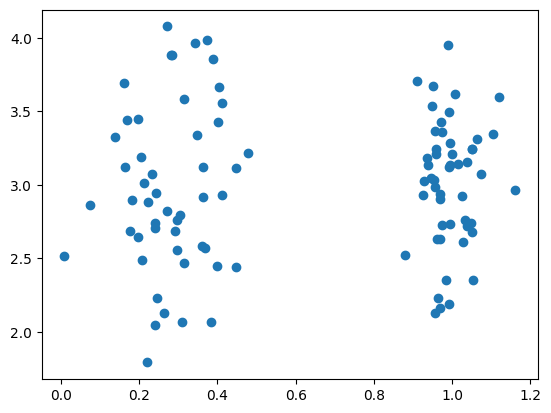

In [870]:
centers = np.array([(0.3, 3), (1, 3)])
blobs = make_blobs(
    n_samples=n_samples,
    centers=centers,
    cluster_std=[(0.1, 0.5), (0.06, 0.5)],
    random_state=random_state
)
dataset = blobs[0] 
plt.scatter(dataset[:, 0], dataset[:, 1], marker='o')

In [910]:
def k_means(dataset, k = None, centers = None):
    next_centers = unwrap_or(
        centers,
        np.column_stack([
            np.random.uniform(np.min(dataset[:, 0]), np.max(dataset[:, 0]), size=2),
            np.random.uniform(np.min(dataset[:, 1]), np.max(dataset[:, 1]), size=2)
        ])
    )

    dim = dataset[1].size
    k = len(next_centers)
    
    prev_centers = np.empty(dim)

    while True:
        if (next_centers == prev_centers).all():
            break

        prev_centers = copy.deepcopy(next_centers)

        clusters = [[] for i in range(k)]
        for x in dataset:
            min_index = 0
            for i in range(1, k):
                if np.linalg.norm(x - prev_centers[i]) <  np.linalg.norm(x - prev_centers[min_index]): 
                    min_index = i
            clusters[min_index].append(x)
        
        for i in range(k):
            N = len(clusters[i])
            x_sum = np.array(clusters[i])
            next_centers[i] = np.multiply(1.0 / N, np.sum(x_sum, axis=0))

    plt.scatter(dataset[:, 0], dataset[:, 1], marker='.')
    plt.scatter(next_centers[:, 0], next_centers[:, 1], color="red", marker='o')  
        

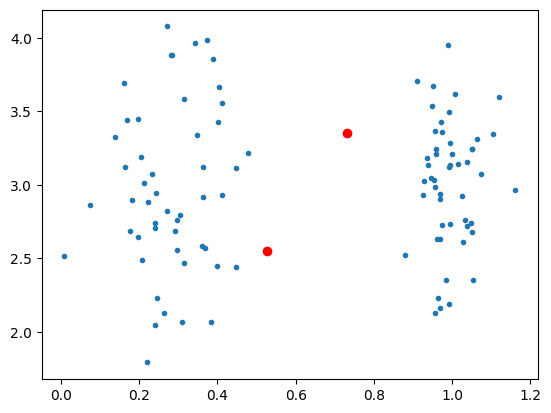

In [911]:
k_means(dataset=dataset)